<a href="https://colab.research.google.com/github/ToaiDinh/ANN_AI/blob/main/ANN_GroupRecognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from keras.models import Sequential
from keras.callbacks import EarlyStopping
from keras.layers import Dense,Activation,Dropout
from keras.utils import np_utils
from keras.preprocessing.image import load_img,img_to_array
from tensorflow.keras.optimizers import RMSprop,Adam
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

filepath = 'drive/MyDrive/data_training/face_recognition/data/train'+str(0)+'.jpg'
img = load_img(filepath,target_size=(150,150))
img = img_to_array(img)
x = np.array([img])
for i in range(1,90):
  filepath = 'drive/MyDrive/data_training/face_recognition/data/train'+str(i)+'.jpg'
  img = load_img(filepath,target_size=(150,150))
  img = img_to_array(img)
  x = np.concatenate((x,[img]),axis=0)
print(x.shape)

(90, 150, 150, 3)


In [ ]:
arr_1 = np.zeros((30,1),np.uint8)
arr_2 = np.ones((30,1),np.uint8)
arr_3 = np.ones((30,1),np.uint8)
for i in range(0,30):
  arr_3[i] = 2
y = np.concatenate((arr_1,arr_2),axis=0)
y = np.concatenate((y,arr_3),axis=0)
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)

In [ ]:
name = ['Hien','Toai','Thuan']

In [ ]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
y_train = np_utils.to_categorical(y_train,3)
y_test = np_utils.to_categorical(y_test,3)
print("x train shape: ",x_train.shape)
print("y train shape: ",y_train.shape)
print("x test shape: ",x_test.shape)
print("y test shape: ",y_test.shape)
print("Max x train ",np.max(x_train))
print("Min x train ",np.min(x_train))

x train shape:  (63, 150, 150, 3)
y train shape:  (63, 3)
x test shape:  (27, 150, 150, 3)
y test shape:  (27, 3)
Max x train  1.0
Min x train  0.0


In [ ]:
from keras.layers import Flatten
model = Sequential()
model.add(Dense(2,activation='relu',kernel_initializer='normal',input_shape=(150,150,3)))
model.add(Flatten())
model.add(Dense(128,activation = 'relu', kernel_initializer = 'normal'))
model.add(Dense(3,activation = 'softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 150, 150, 2)       8         
                                                                 
 flatten_2 (Flatten)         (None, 45000)             0         
                                                                 
 dense_7 (Dense)             (None, 128)               5760128   
                                                                 
 dense_8 (Dense)             (None, 3)                 387       
                                                                 
Total params: 5,760,523
Trainable params: 5,760,523
Non-trainable params: 0
_________________________________________________________________


Epoch 1/200
32/32 [==============================] - 5s 118ms/step - loss: 1.0989 - accuracy: 0.3492 - val_loss: 1.0995 - val_accuracy: 0.3077
Epoch 2/200
32/32 [==============================] - 3s 106ms/step - loss: 1.0985 - accuracy: 0.3492 - val_loss: 1.0994 - val_accuracy: 0.3077
Epoch 3/200
32/32 [==============================] - 3s 85ms/step - loss: 1.0985 - accuracy: 0.3492 - val_loss: 1.0993 - val_accuracy: 0.3077
Epoch 4/200
32/32 [==============================] - 3s 86ms/step - loss: 1.0985 - accuracy: 0.3492 - val_loss: 1.0993 - val_accuracy: 0.3077
Epoch 5/200
32/32 [==============================] - 3s 86ms/step - loss: 1.0986 - accuracy: 0.3492 - val_loss: 1.0993 - val_accuracy: 0.3077
Epoch 6/200
32/32 [==============================] - 3s 86ms/step - loss: 1.0984 - accuracy: 0.3492 - val_loss: 1.0993 - val_accuracy: 0.3077
Epoch 7/200
32/32 [==============================] - 3s 87ms/step - loss: 1.0985 - accuracy: 0.3492 - val_loss: 1.0994 - val_accuracy: 0.3077
Epoc

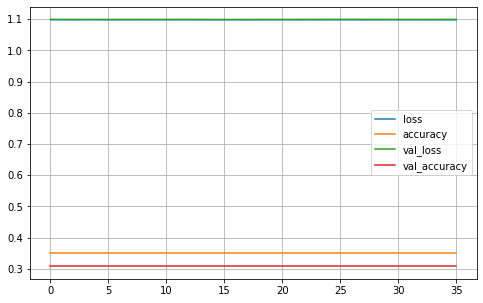

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: MatplotlibDeprecationWarning: Unrecognized location 'upper_left'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  from ipykernel import kernelapp as app


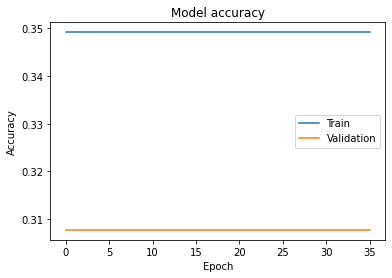

In [ ]:
model.compile(loss='categorical_crossentropy',optimizer=RMSprop(),metrics='accuracy')
history = model.fit(x_train,y_train,batch_size=2,epochs=200,verbose=1,validation_data=(x_test,y_test),callbacks=[EarlyStopping(monitor='val_loss',patience=20)])
score = model.evaluate(x_test,y_test,verbose=0)
print("Error: ",score[0])
print("Accuracy: ",score[1])
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.show()
print('\n')
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'],loc='upper_left')
plt.show()

In [ ]:
model_json = model.to_json()
with open('drive/MyDrive/data_training/face_recognition/group_recognition_config.json','w') as file_json:
  file_json.write(model_json)
model.save_weights('drive/MyDrive/data_training/face_recognition/group_recognition_weights.h5')

[0]


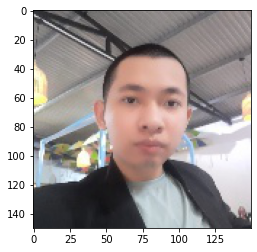

In [ ]:
url = 'drive/MyDrive/data_test/group_recognition/test'+str(0)+'.jpg'
img = load_img(url,target_size=(150,150))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,150,150,3)
img = img.astype('float32')
img = img/255
pred = np.argmax(model.predict(img),axis=1)
print(pred)